In [2]:
import warnings

warnings.filterwarnings('ignore')

In [3]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = (12, 8)

In [4]:
def predict(row, weights):
    activation = weights[0]
    for i in range(len(row)-1):
        activation += weights[i + 1] * row[i]
    return 1.0 if activation >= 0.0 else 0.0

In [5]:
dataset = [[2, 3, 0], 
           [4, 5, 0],
           [11, 11, 1],
           [4, 11, 1],
           [12, 5, 0],
           [5, 2, 0],
           [6, 1, 0],
           [6, 3, 0],
           [2, 10, 1],
           [4, 7, 1],
           [13, 8, 0],
           [1, 6, 1],
           [6, 9, 1],
           [10, 12, 1],
           [8, 3, 0],
           [2, 8, 1]]
           
# (bias, w1 and w2).
weights = [.05, .05, .05]

In [6]:
for row in dataset:
    prediction = predict(row, weights)
    print("Expected=%d, Predicted=%d" % (row[-1], prediction))

Expected=0, Predicted=1
Expected=0, Predicted=1
Expected=1, Predicted=1
Expected=1, Predicted=1
Expected=0, Predicted=1
Expected=0, Predicted=1
Expected=0, Predicted=1
Expected=0, Predicted=1
Expected=1, Predicted=1
Expected=1, Predicted=1
Expected=0, Predicted=1
Expected=1, Predicted=1
Expected=1, Predicted=1
Expected=1, Predicted=1
Expected=0, Predicted=1
Expected=1, Predicted=1


In [7]:
# Estimate Perceptron weights using stochastic gradient descent
def train_weights(train, l_rate, n_epoch):
    weights = [0.5 for i in range(len(train[0]))]
    for epoch in range(n_epoch):
        sum_error = 0.0
        for row in train:
            prediction = predict(row, weights)
            error = row[-1] - prediction
            sum_error += error**2
            weights[0] = weights[0] + l_rate * error
            for i in range(len(row)-1):
                weights[i + 1] = weights[i + 1] + l_rate * error * row[i]
        print('>epoch=%d, lrate=%.3f, error=%.3f' % (epoch, l_rate, sum_error))
    return weights

In [8]:
l_rate = 0.1
n_epoch = 80
weights = train_weights(dataset, l_rate, n_epoch)
print(weights)

>epoch=0, lrate=0.100, error=7.000
>epoch=1, lrate=0.100, error=3.000
>epoch=2, lrate=0.100, error=5.000
>epoch=3, lrate=0.100, error=4.000
>epoch=4, lrate=0.100, error=3.000
>epoch=5, lrate=0.100, error=3.000
>epoch=6, lrate=0.100, error=5.000
>epoch=7, lrate=0.100, error=2.000
>epoch=8, lrate=0.100, error=3.000
>epoch=9, lrate=0.100, error=4.000
>epoch=10, lrate=0.100, error=5.000
>epoch=11, lrate=0.100, error=2.000
>epoch=12, lrate=0.100, error=3.000
>epoch=13, lrate=0.100, error=4.000
>epoch=14, lrate=0.100, error=4.000
>epoch=15, lrate=0.100, error=4.000
>epoch=16, lrate=0.100, error=2.000
>epoch=17, lrate=0.100, error=3.000
>epoch=18, lrate=0.100, error=2.000
>epoch=19, lrate=0.100, error=4.000
>epoch=20, lrate=0.100, error=3.000
>epoch=21, lrate=0.100, error=2.000
>epoch=22, lrate=0.100, error=4.000
>epoch=23, lrate=0.100, error=3.000
>epoch=24, lrate=0.100, error=2.000
>epoch=25, lrate=0.100, error=4.000
>epoch=26, lrate=0.100, error=2.000
>epoch=27, lrate=0.100, error=2.000
>e

In [9]:
for row in dataset:
    prediction = predict(row, weights)
    print("Expected=%d, Predicted=%d" % (row[-1], prediction))

Expected=0, Predicted=0
Expected=0, Predicted=0
Expected=1, Predicted=1
Expected=1, Predicted=1
Expected=0, Predicted=0
Expected=0, Predicted=0
Expected=0, Predicted=0
Expected=0, Predicted=0
Expected=1, Predicted=1
Expected=1, Predicted=1
Expected=0, Predicted=0
Expected=1, Predicted=1
Expected=1, Predicted=1
Expected=1, Predicted=1
Expected=0, Predicted=0
Expected=1, Predicted=1


In [10]:
arr = np.array(dataset)
X = arr[::,0:2]
y = arr[::,-1]

0.8409090909090903 1.681818181818173


[]

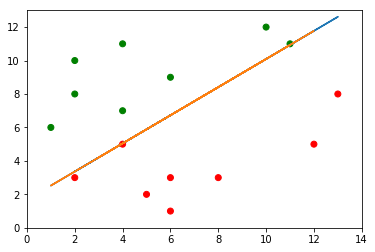

In [11]:
fig, ax = plt.subplots()
colors = ['red','green']
xmin, xmax = 0, 14
ax.scatter(arr[::,0:1], arr[::,1:2], c=arr[::,2:], cmap=matplotlib.colors.ListedColormap(colors))
ax.set_xlim([xmin, xmax])
ax.set_ylim([0, 13])
m = -weights[1] / weights[2]
c = -weights[0] / weights[2]
print(m, c)
ax.plot(X, m * X + c )
plt.plot()

In [12]:
import numpy as np
from collections import Counter

class Perceptron:
    
    def __init__(self, 
                 weights,
                 bias=1,
                 learning_rate=0.3):
        """
        'weights' can be a numpy array, list or a tuple with the
        actual values of the weights. The number of input values
        is indirectly defined by the length of 'weights'
        """
        self.weights = np.array(weights)
        self.bias = bias
        self.learning_rate = learning_rate
        
    @staticmethod
    def unit_step_function(x):
        if  x <= 0:
            return 0
        else:
            return 1
        
    def __call__(self, in_data):
        in_data = np.concatenate( (in_data, [self.bias]) )
        result = self.weights @ in_data
        return Perceptron.unit_step_function(result)
    
    def adjust(self, 
               target_result, 
               in_data):
        if type(in_data) != np.ndarray:
            in_data = np.array(in_data)  # 
        calculated_result = self(in_data)
        error = target_result - calculated_result
        if error != 0:
            in_data = np.concatenate( (in_data, [self.bias]) )
            correction = error * in_data * self.learning_rate
            self.weights += correction
            
    def evaluate(self, data, labels):
        evaluation = Counter()
        for sample, label in zip(data, labels):
            result = self(sample) # predict
            if result == label:
                evaluation["correct"] += 1
            else:
                evaluation["wrong"] += 1
        return evaluation

In [13]:
def labelled_samples(n):
    for _ in range(n):
        s = np.random.randint(0, 2, (2,))
        yield (s, 1) if s[0] == 1 and s[1] == 1 else (s, 0)

p = Perceptron(weights=[0.3, 0.3, 0.3],
               learning_rate=0.2)

for in_data, label in labelled_samples(30):
    p.adjust(label, 
             in_data)

test_data, test_labels = list(zip(*labelled_samples(30)))

evaluation = p.evaluate(test_data, test_labels)
print(evaluation)

Counter({'correct': 30})


-0.33333333333333326 1.0000000000000002


[]

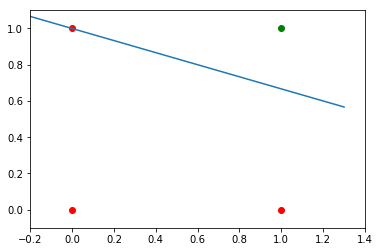

In [14]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()
xmin, xmax = -0.2, 1.4
X = np.arange(xmin, xmax, 0.1)
ax.scatter(0, 0, color="r")
ax.scatter(0, 1, color="r")
ax.scatter(1, 0, color="r")
ax.scatter(1, 1, color="g")
ax.set_xlim([xmin, xmax])
ax.set_ylim([-0.1, 1.1])
m = -p.weights[0] / p.weights[1]
c = -p.weights[2] / p.weights[1]
print(m, c)
ax.plot(X, m * X + c )
plt.plot()

In [15]:
for in_data, label in labelled_samples(30):
    print(in_data, label)

[1 0] 0
[0 0] 0
[1 0] 0
[0 0] 0
[0 0] 0
[1 1] 1
[1 1] 1
[1 1] 1
[1 0] 0
[1 0] 0
[1 0] 0
[0 0] 0
[1 1] 1
[1 1] 1
[0 1] 0
[0 0] 0
[0 1] 0
[0 0] 0
[1 0] 0
[1 1] 1
[1 1] 1
[1 1] 1
[0 0] 0
[0 0] 0
[1 0] 0
[1 0] 0
[1 1] 1
[1 1] 1
[1 1] 1
[1 0] 0


In [16]:
for x in arr[::, 0]

2
3
0
4
5
0
11
11
1
4
11
1
12
5
0
5
2
0
6
1
0
6
3
0
2
10
1
4
7
1
13
8
0
1
6
1
6
9
1
10
12
1
8
3
0
2
8
1
